# Predicting Heart Diseases with Logistic Regression

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data
Read the train_framingham.csv file into a pandas dataframe

In [2]:
train = pd.read_csv("./framingham.csv")

In [4]:
display(train.head())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,37,2.0,1,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
1,0,61,1.0,0,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
2,1,44,2.0,1,15.0,0.0,0,0,0,209.0,127.0,86.0,26.41,85.0,88.0,0
3,1,47,3.0,1,15.0,0.0,0,1,0,220.0,127.0,93.0,30.70,82.0,57.0,0
4,0,41,3.0,1,3.0,0.0,0,0,0,140.0,110.0,60.0,23.38,65.0,82.0,0


In [5]:
train.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1288.000000,1288.000000,1257.000000,1288.000000,1280.000000,1271.000000,1288.000000,1288.000000,1288.000000,1270.000000,1288.000000,1288.000000,1278.000000,1287.000000,1180.000000,1288.000000
mean,0.481366,51.357919,1.922037,0.506988,9.832031,0.044847,0.010093,0.394410,0.040373,240.972441,137.215062,84.840839,26.204953,76.161616,84.838983,0.500000
std,0.499847,8.541684,1.024524,0.500145,12.360208,0.207049,0.099995,0.488913,0.196908,46.648849,24.840985,13.059063,4.402539,12.162213,33.537838,0.500194
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.000000,120.000000,75.875000,23.282500,68.000000,72.000000,0.000000
50%,0.000000,51.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,237.000000,133.000000,84.000000,25.820000,75.000000,78.000000,0.500000
75%,1.000000,58.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,266.000000,150.000000,92.000000,28.490000,83.000000,87.000000,1.000000
max,1.000000,70.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,125.000000,394.000000,1.000000


### Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

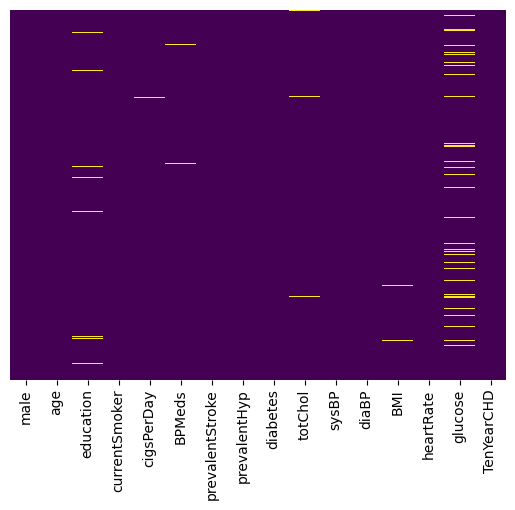

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()  # shows us where missing data is

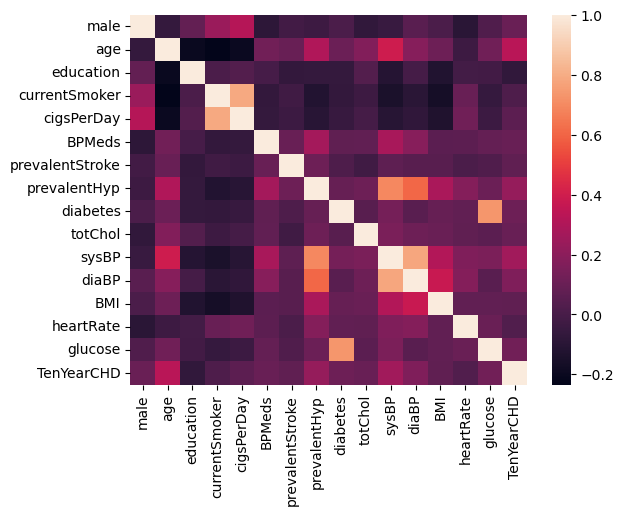

In [7]:
sns.heatmap(train.corr())
plt.show()  # this is just the data we have

#### Drop Missing Data

In [10]:
train = train.dropna()

#### Data Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
numeric_features = [
    "age", 
    "cigsPerDay", 
    "totChol",
    "sysBP",
    "diaBP",
    "BMI",
    "heartRate",
    "glucose"
]

Apply the Standard Scaler to all numeric features

In [17]:
train[numeric_features] = StandardScaler().fit_transform(train[numeric_features])

In [18]:
train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2,1,-0.852262,2.0,1,0.431861,0.0,0,0,0,-0.686549,-0.415531,0.079783,0.039784,0.737159,0.099742,0
3,1,-0.502640,3.0,1,0.431861,0.0,0,1,0,-0.453261,-0.415531,0.606828,1.008981,0.491341,-0.829773,0
4,0,-1.201883,3.0,1,-0.547512,0.0,0,0,0,-2.149901,-1.095556,-1.877814,-0.644754,-0.901625,-0.080164,0
5,0,-0.153018,2.0,1,0.839934,0.0,0,0,0,0.352642,-0.575537,-1.124892,-1.471621,0.327463,-0.409992,0
6,1,0.196603,1.0,1,0.431861,0.0,0,1,0,0.395058,0.184491,0.230367,-0.583755,1.638491,-0.230086,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1,-0.153018,1.0,0,-0.792356,0.0,0,0,0,0.395058,-0.735543,-0.823723,-0.990411,0.327463,-0.380008,1
1284,1,0.546225,4.0,0,-0.792356,1.0,0,1,0,0.967674,0.464501,0.983289,-1.028818,1.146855,-0.290055,1
1285,1,0.779306,1.0,0,-0.792356,0.0,0,0,0,-0.177558,-0.475533,-0.070802,-0.041547,-0.737747,-0.260070,1
1286,1,1.944712,1.0,0,-0.792356,0.0,0,1,0,-1.386413,1.224530,0.907997,-0.698974,-1.311322,-0.170117,1


#### Data Visualization

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

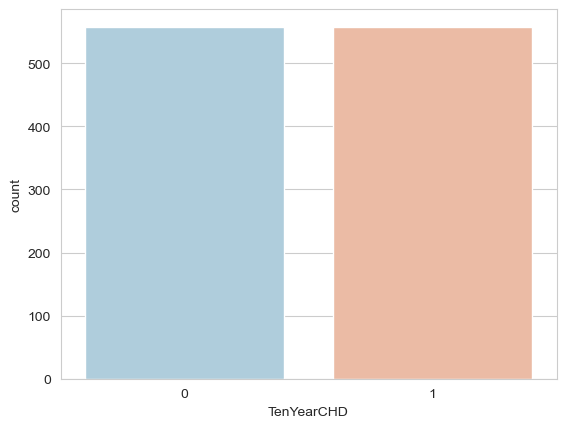

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

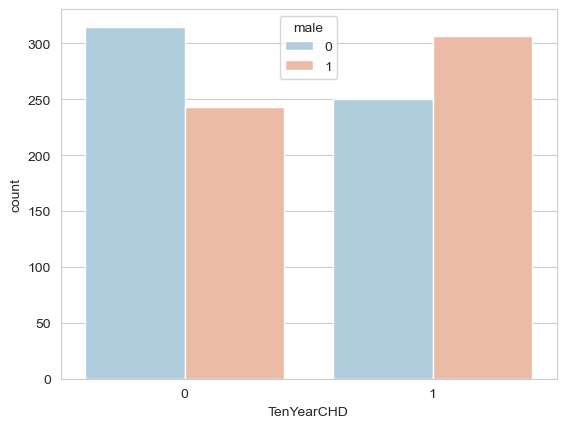

In [20]:
#Plot the below plot
sns.countplot(x='TenYearCHD',hue="male", data=train,palette='RdBu_r')

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop("TenYearCHD"), train["TenYearCHD"], test_size=.2,
    random_state=42
)

KeyError: "['TenYearCHD'] not found in axis"

### Training and Predicting

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
logmodel = ...
#Fit the model

LogisticRegression(solver='liblinear')

In [217]:
#make predictions
predictions = ...

### Evaluation
We can check precision,recall,f1-score using classification report!

In [218]:
from sklearn.metrics import classification_report

In [ ]:
...